In [158]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [159]:
df = pd.read_csv("/home/agustin/coding/datasets/titanic/titanic.csv",sep=",")
dataset = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
dataset.head()

,Survived,Pclass,Sex,Age
0,0,3,male,34.5
1,1,3,female,47.0
2,0,2,male,62.0
3,0,3,male,27.0
4,1,3,female,22.0


In [160]:
dummy = pd.get_dummies(dataset['Sex'])
dataset_v2 = pd.concat((dataset,dummy), axis=1)
dataset_v2.head()


,Survived,Pclass,Sex,Age,female,male
0,0,3,male,34.5,0,1
1,1,3,female,47.0,1,0
2,0,2,male,62.0,0,1
3,0,3,male,27.0,0,1
4,1,3,female,22.0,1,0


In [161]:
dataset_v2 = dataset_v2.drop(['male'],axis=1)
dataset_v2 = dataset_v2.drop(['Sex'],axis=1)
dataset_v2.rename(columns = {'female':'sex'}, inplace = True)
dataset_v2.head()


,Survived,Pclass,Age,sex
0,0,3,34.5,0
1,1,3,47.0,1
2,0,2,62.0,0
3,0,3,27.0,0
4,1,3,22.0,1


In [162]:
dataset.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
dtype: int64

In [163]:
dataset = dataset.dropna(axis=0)
dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [164]:
dataset.describe()

,Survived,Pclass,Age
count,332.000000,332.000000,332.000000
mean,0.382530,2.144578,30.272590
std,0.486739,0.846283,14.181209
min,0.000000,1.000000,0.170000
25%,0.000000,1.000000,21.000000
50%,0.000000,2.000000,27.000000
75%,1.000000,3.000000,39.000000
max,1.000000,3.000000,76.000000


In [165]:
dataset_v2.groupby(['sex','Pclass']).mean()

Survived        Age
sex Pclass                     
0   1            0.0  40.520000
    2            0.0  30.940678
    3            0.0  24.525104
1   1            1.0  41.333333
    2            1.0  24.376552
    3            1.0  23.073400

In [166]:
dataset_v2[dataset_v2['Age']<18].groupby(['sex','Pclass']).mean()

Survived        Age
sex Pclass                     
0   1            0.0  12.000000
    2            0.0  10.250000
    3            0.0   9.524118
1   2            1.0   8.153333
    3            1.0   8.379091

<Axes: xlabel='Survived', ylabel='count'>

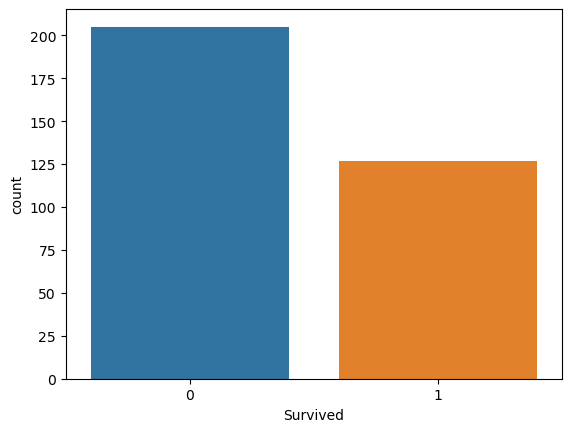

In [167]:
sns.countplot(dataset,x='Survived')

<Axes: xlabel='Age', ylabel='Count'>

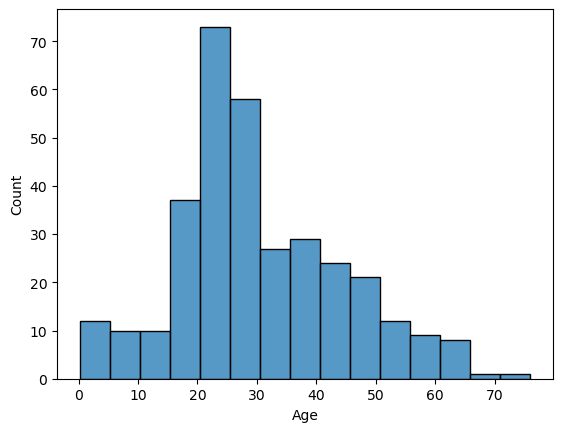

In [168]:
sns.histplot(dataset,x='Age')

In [183]:
corr_matrix = dataset_v2.corr()
corr_matrix

,Survived,Pclass,Age,sex
Survived,1.000000,-0.108615,-0.000013,1.000000
Pclass,-0.108615,1.000000,-0.492143,-0.108615
Age,-0.000013,-0.492143,1.000000,-0.000013
sex,1.000000,-0.108615,-0.000013,1.000000


<Axes: >

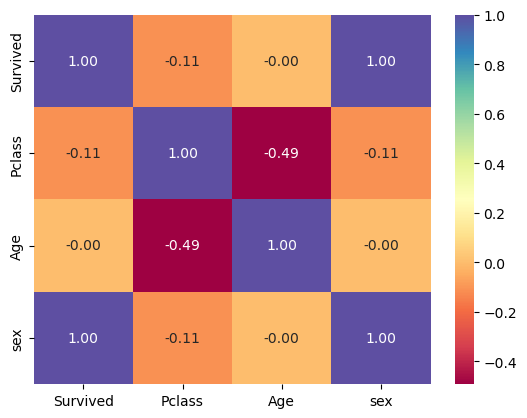

In [184]:
sns.heatmap(corr_matrix,
            cmap="Spectral",
            fmt=".2f",
            annot=True)
